In [39]:
import numpy as np, matplotlib.pyplot as plt

101
201


Text(0, 0.5, 'Magnitude')

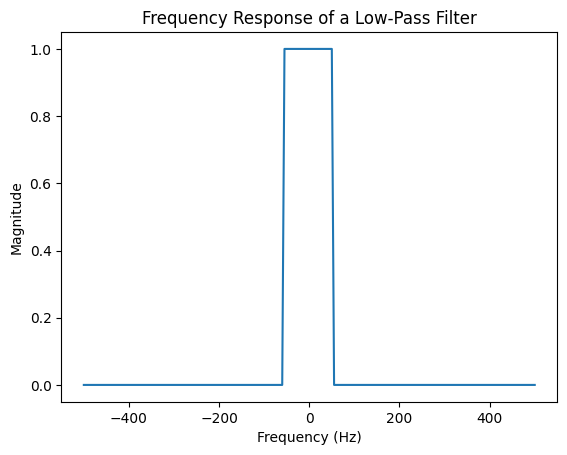

In [40]:
'''
The input should be ordered in the same way as is returned by fft, i.e.,
a[0] should contain the zero frequency term,
a[1:n//2] should contain the positive-frequency terms,
a[n//2 + 1:] should contain the negative-frequency terms, in increasing order starting from the most negative frequency.
'''

fs = 1000
N = 201
fc = 50

freqs_x = np.linspace(-fs/2, fs/2, N)

freq = np.linspace(0,fs/2,(((N-1)//2) + 1))
print(len(freq))
H = np.where(freq<=fc, 1, 0)
H_full = np.concatenate((H, H[::-1][1:]))

print(len(H_full))

plt.figure()
plt.plot(freqs_x,np.fft.fftshift(H_full))
plt.title('Frequency Response of a Low-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

(0.10945273631840796+0j)


c:\Users\a1c2c\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\a1c2c\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


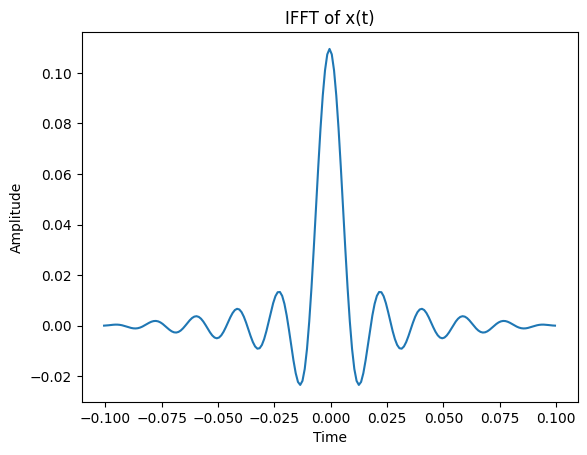

In [41]:
t = np.arange(-N/2,N/2)/fs

xt = np.fft.fftshift(np.fft.ifft(H_full))
print(xt[(N-1)//2])  # Should be close to 0

plt.plot(t,xt)
plt.title('IFFT of x(t)')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


51


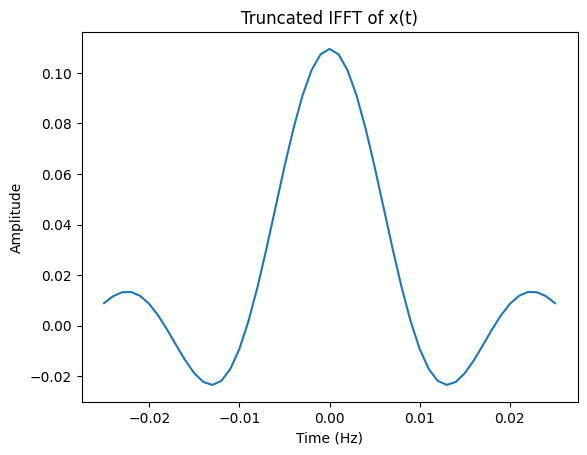

In [ ]:
M = 50  #Filter Order
mid = (N-1)/2

truncated_xt = xt[int(mid-(M/2)):int(mid+(M/2)+1)]
print(len(truncated_xt))

t_truncated = np.arange(-M/2,M/2+1)/fs

plt.figure()
plt.plot(t_truncated,np.real(truncated_xt))  
plt.title('Truncated IFFT of x(t)')
plt.xlabel("Time (Hz)")
plt.ylabel("Amplitude")
plt.show()

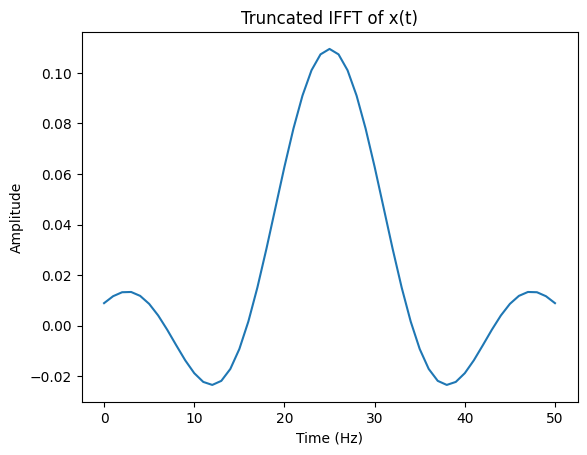

In [43]:
#i'm assuming its already shifted to run from 0 to M - as we're convoloving the filter with the signal from 0 to M and not -M to M
#so the filter impulse response looks like this

plt.figure()
plt.plot(np.real(truncated_xt))  
plt.title('Truncated IFFT of x(t)')
plt.xlabel("Time (Hz)")
plt.ylabel("Amplitude")
plt.show()

150
201


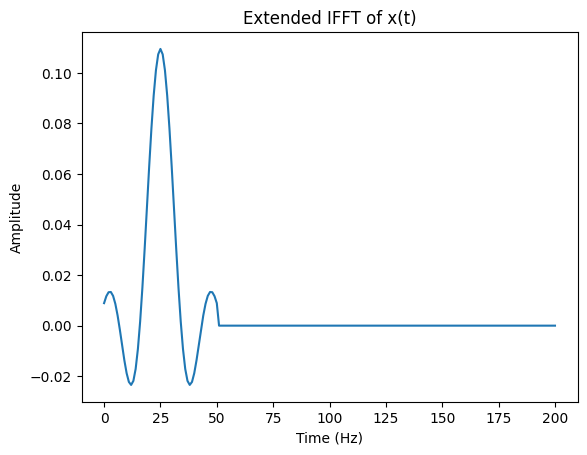

In [44]:
#extend the truncated xt to 201 samples
extended_xt = np.zeros(N-(M+1)) #150
print(len(extended_xt))
extended_xt = np.concatenate((truncated_xt, extended_xt))
print(len(extended_xt)) #201


plt.figure()
plt.plot(np.real(extended_xt))
plt.title('Extended IFFT of x(t)')  
plt.xlabel("Time (Hz)")
plt.ylabel("Amplitude")
plt.show()

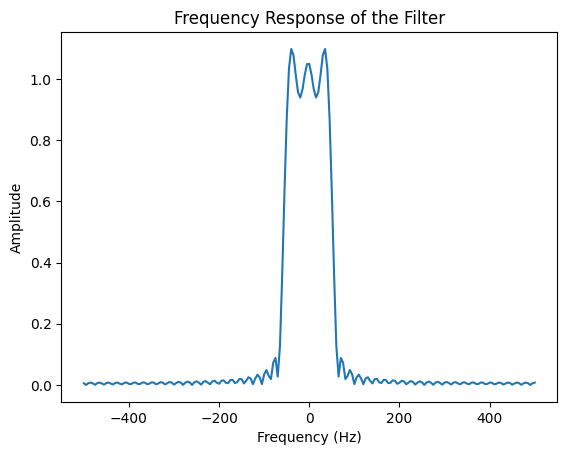

In [45]:
#Plot the frequency response of the filter
f_truncated = np.fft.fft(extended_xt)
freq = np.linspace(-fs/2,fs/2,N)

plt.figure()
plt.plot(freq,np.abs(np.fft.fftshift(f_truncated)))
plt.title('Frequency Response of the Filter')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

5000


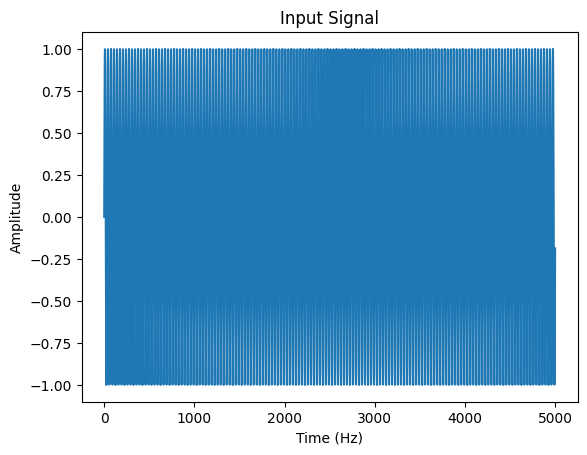

In [46]:
t = np.arange(0, 5, 1/fs)  # Time vector for 1 second
print(len(t))
signal = np.sin(2*np.pi*30*t)

plt.figure()
plt.plot(signal)
plt.title('Input Signal')
plt.xlabel("Time (Hz)")
plt.ylabel("Amplitude")
plt.show()

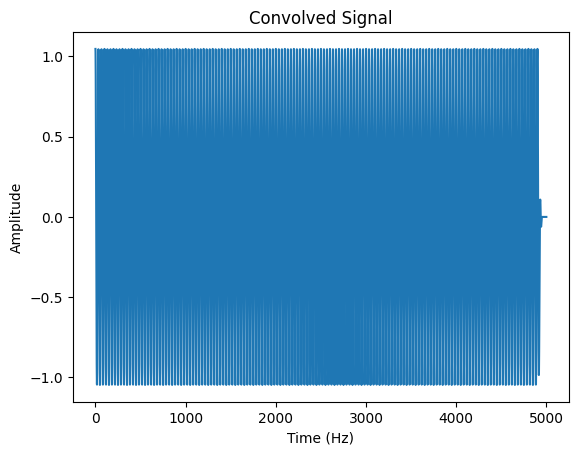

In [48]:
y = np.convolve(signal, extended_xt, mode='same')

plt.figure()
plt.plot(y)
plt.title('Convolved Signal')
plt.xlabel("Time (Hz)")
plt.ylabel("Amplitude")
plt.show()